## Imports

In [ ]:

!pip install pyccel
import numpy as np
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D

import time
from numba import njit
from pyccel.epyccel import epyccel
from pyccel.decorators import types

     |████████████████████████████████| 286kB 13.7MB/s 
     |████████████████████████████████| 81kB 8.9MB/s 
     |████████████████████████████████| 61kB 5.9MB/s 


## Pure python function

In [ ]:
def solve_2d_diff_pure(u, un, nt, dt, dx, dy, nu):
    row, col = u.shape
    
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 
    
    for n in range(nt + 1):
      for j in range(row): 
        for i in range(col):
          un[j][i] = u[j][i] 
      
      for j in range(2, row):
        for i in range(2, col):
          u[j-1, i-1] = (un[j-1, i-1] + nu * dt / dx**2 * (un[j-1, i] - 2 * un[j-1, i-1] + un[j-1,i-2]) + nu * dt / dy**2 * (un[j, i-1] - 2 * un[j-1, i-1] + un[j-2,i-1])) 
          
          u[0, :] = 1
          u[-1, :] = 1
          u[:, 0] = 1
          u[:, -1] = 1 
    return 0

## Numba accelerator

In [ ]:
@njit(fastmath=True)
def solve_2d_diff_numba(u, un, nt, dt, dx, dy, nu):
    row, col = u.shape
    
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 
    
    for n in range(nt + 1):
      for j in range(row): 
        for i in range(col):
          un[j][i] = u[j][i] 
      
      for j in range(2, row):
        for i in range(2, col):
          u[j-1, i-1] = (un[j-1, i-1] + nu * dt / dx**2 * (un[j-1, i] - 2 * un[j-1, i-1] + un[j-1,i-2]) + nu * dt / dy**2 * (un[j, i-1] - 2 * un[j-1, i-1] + un[j-2,i-1])) 
          
          u[0, :] = 1
          u[-1, :] = 1
          u[:, 0] = 1
          u[:, -1] = 1 
    return 0

## Pyccel accelerator

In [ ]:

def solve_2d_diff_pyccel(u:'float[:,:]', un:'float[:,:]', nt:'int', dt:'float', dx:'float', dy:'float', nu:'float'):
    row, col = u.shape
    
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 
    
    for n in range(nt + 1):
      for j in range(row): 
        for i in range(col):
          un[j][i] = u[j][i] 
      
      for j in range(2, row):
        for i in range(2, col):
          u[j-1, i-1] = (un[j-1, i-1] + nu * dt / dx**2 * (un[j-1, i] - 2 * un[j-1, i-1] + un[j-1,i-2]) + nu * dt / dy**2 * (un[j, i-1] - 2 * un[j-1, i-1] + un[j-2,i-1])) 
          
          u[0, :] = 1
          u[-1, :] = 1
          u[:, 0] = 1
          u[:, -1] = 1 
    return 0

## Inputs

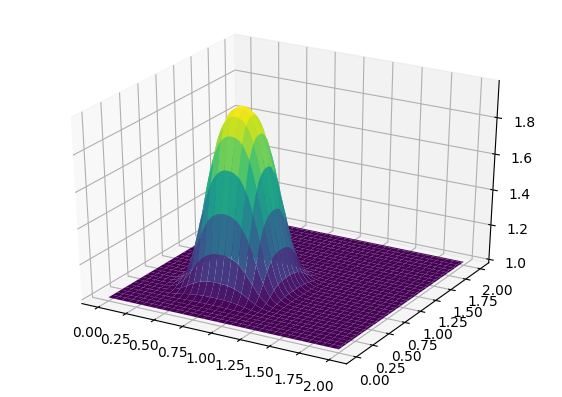

In [ ]:
###variable declarations
nt = 51
nx = 101
ny = 101
nu = .05
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .25
dt = sigma * dx * dy / nu

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((ny, nx))  # create a 1xn vector of 1's
un = np.ones((ny, nx))
    

solve_2d_diff_pure(u, un, nt, dt, dx, dy, nu)

fig = pyplot.figure(figsize=(7, 5), dpi=100)
ax = fig.gca(projection='3d')                      
X, Y = np.meshgrid(x, y)                            
surf = ax.plot_surface(X, Y, u, cmap=cm.viridis)

## Call Funtions

### Pure function

In [ ]:
%timeit solve_2d_diff_pure(u, un, nt, dt, dx, dy, nu)

1 loop, best of 5: 3.58 s per loop


### Function with numba accelerator

In [ ]:
%timeit solve_2d_diff_numba(u, un, nt, dt, dx, dy, nu)

The slowest run took 17.93 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 5: 54.4 ms per loop


### Function with pyccel accelerator

In [ ]:
solve_2d_diff_f90 = epyccel(solve_2d_diff_pyccel)

In [ ]:
%timeit solve_2d_diff_f90(u, un, nt, dt, dx, dy, nu)

10 loops, best of 5: 106 ms per loop
